# Housing Price Prediction

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head(2))
print(test.head(2))

NameError: name 'pd' is not defined

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.isnull().sum()
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [5]:
for col in train.columns:
    n = train[col].isnull().sum() / len(train[col].values)
    print(f"{col} null : {n.round(3)}")

Id null : 0.0
MSSubClass null : 0.0
MSZoning null : 0.0
LotFrontage null : 0.177
LotArea null : 0.0
Street null : 0.0
Alley null : 0.938
LotShape null : 0.0
LandContour null : 0.0
Utilities null : 0.0
LotConfig null : 0.0
LandSlope null : 0.0
Neighborhood null : 0.0
Condition1 null : 0.0
Condition2 null : 0.0
BldgType null : 0.0
HouseStyle null : 0.0
OverallQual null : 0.0
OverallCond null : 0.0
YearBuilt null : 0.0
YearRemodAdd null : 0.0
RoofStyle null : 0.0
RoofMatl null : 0.0
Exterior1st null : 0.0
Exterior2nd null : 0.0
MasVnrType null : 0.597
MasVnrArea null : 0.005
ExterQual null : 0.0
ExterCond null : 0.0
Foundation null : 0.0
BsmtQual null : 0.025
BsmtCond null : 0.025
BsmtExposure null : 0.026
BsmtFinType1 null : 0.025
BsmtFinSF1 null : 0.0
BsmtFinType2 null : 0.026
BsmtFinSF2 null : 0.0
BsmtUnfSF null : 0.0
TotalBsmtSF null : 0.0
Heating null : 0.0
HeatingQC null : 0.0
CentralAir null : 0.0
Electrical null : 0.001
1stFlrSF null : 0.0
2ndFlrSF null : 0.0
LowQualFinSF null : 0

In [6]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


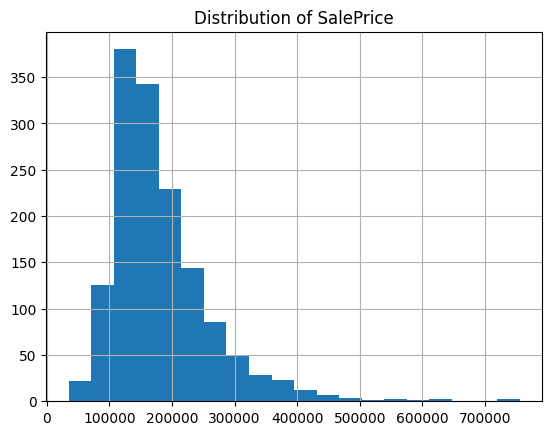

In [8]:
# understanding target variable

train['SalePrice'].hist(bins=20)
plt.title('Distribution of SalePrice')
plt.show()

In [9]:
# plt.figure(figsize = (12,8))
# c = train.corr(numeric_only = True)
# sns.heatmap(c, annot = True, fmt = '.1f', cmap = 'rainbow')
# plt.title('heatmap')
# plt.show()

<Axes: >

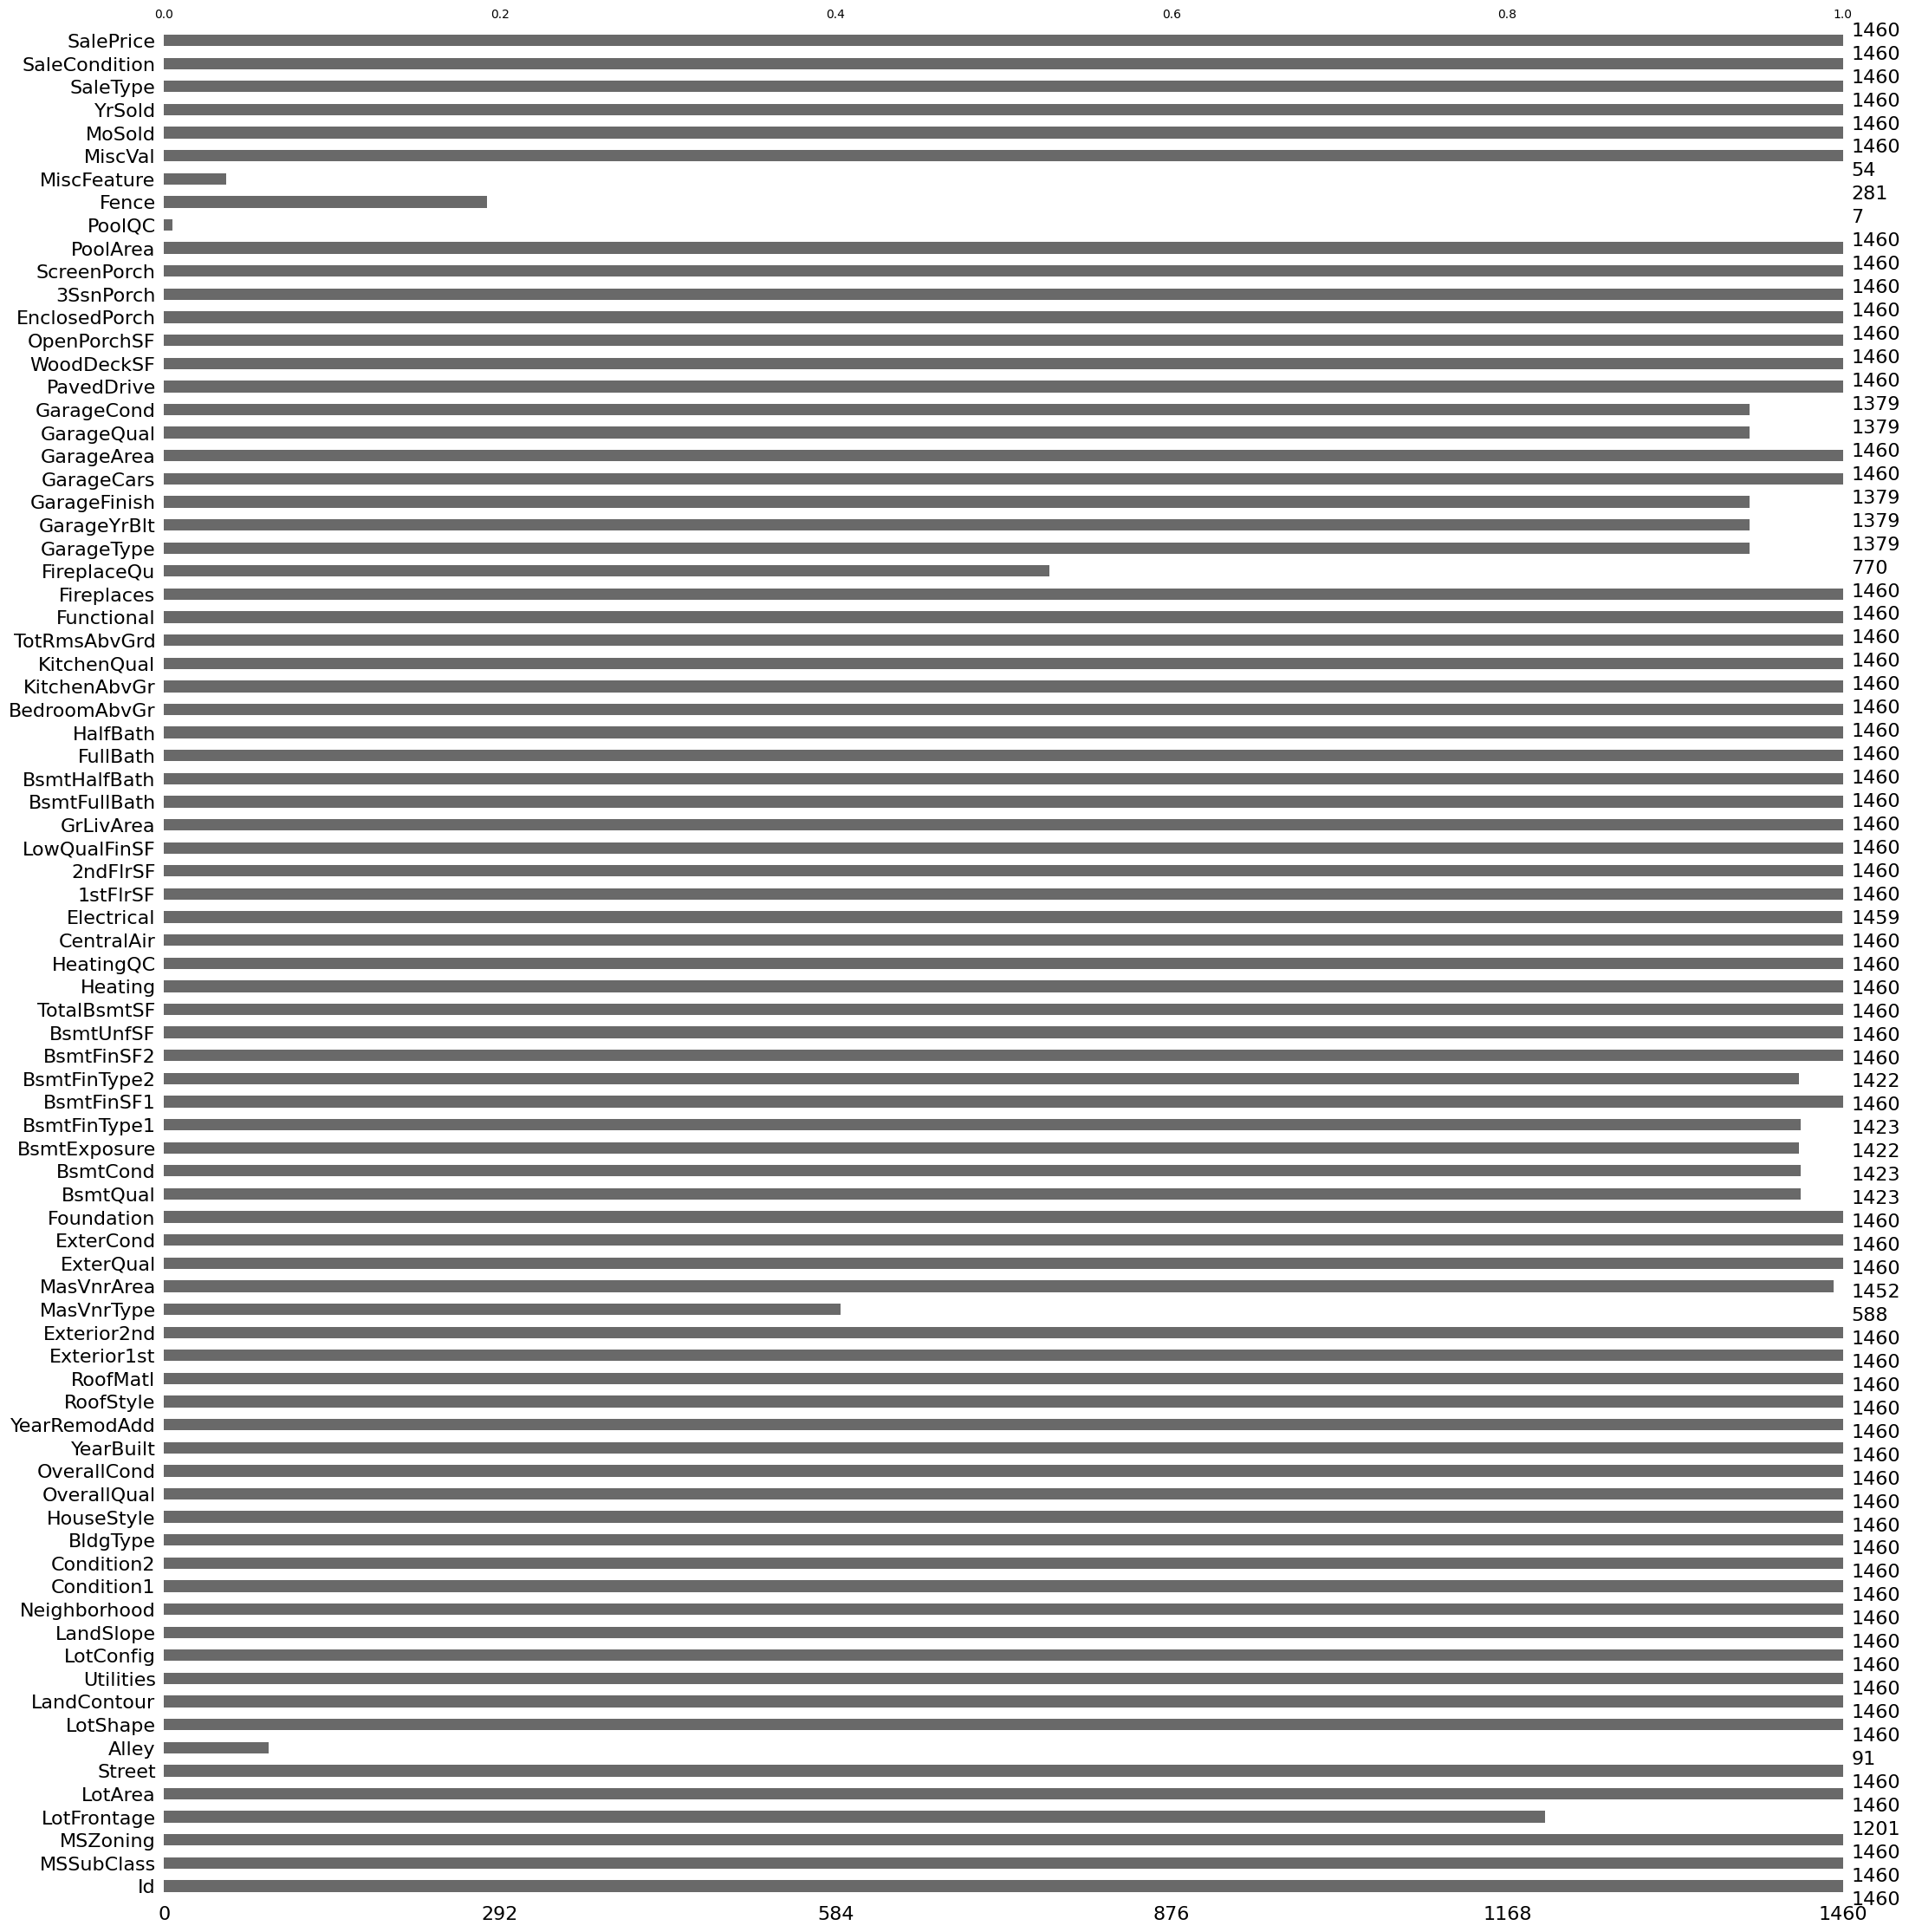

In [10]:
# handling missing values

msno.bar(train)

In [11]:
train = train.drop(['PoolQC','MiscFeature','Fence','MasVnrType','Alley'],axis=1)
test = test.drop(['PoolQC','MiscFeature','Fence','MasVnrType','Alley'],axis=1)

In [12]:

test.shape

(1459, 75)

In [13]:
train.shape

(1460, 76)

In [14]:
# using mode for categorical columns and median for numerical columns

for col in train.columns:
    if train[col].isnull().sum()>0 and train[col].dtype=='O':
        train[col].fillna(train[col].mode()[0],inplace=True)

for col in train.columns:
    if train[col].isnull().sum()>0 and train[col].dtypes!='O':
        
        train[col].fillna(train[col].median(), inplace=True)

<Axes: >

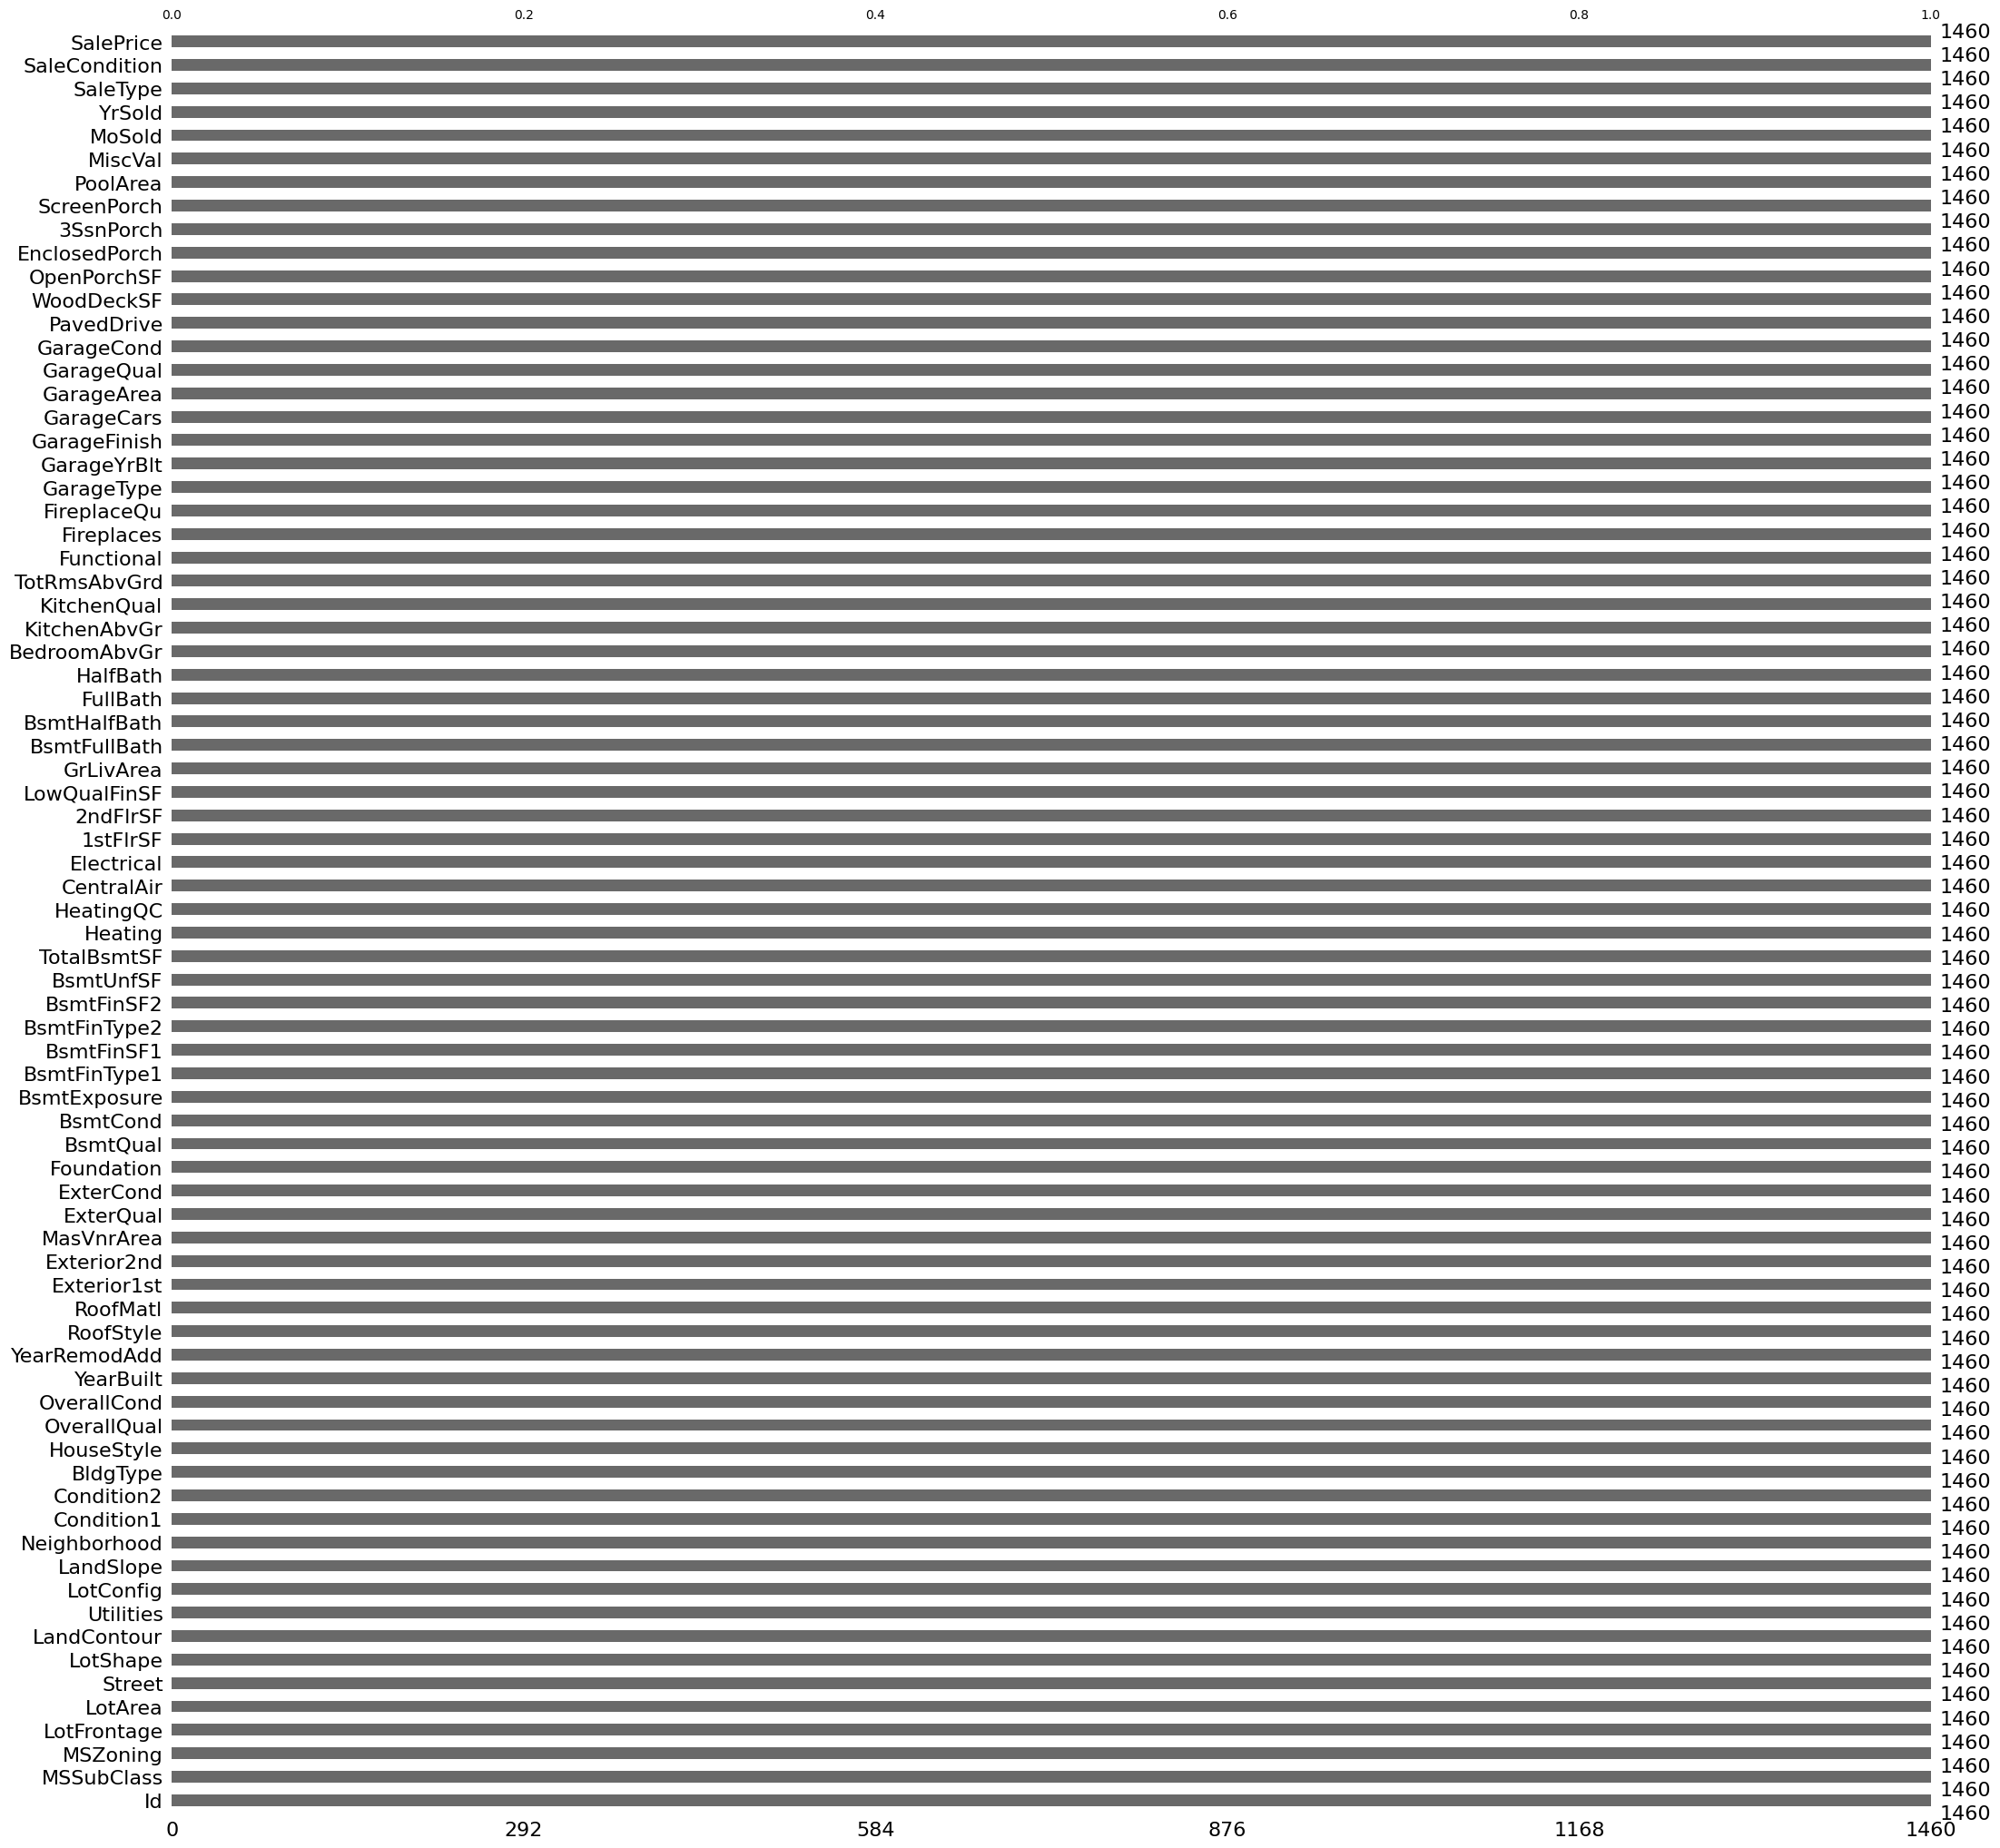

In [15]:
msno.bar(train)

In [16]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = train.select_dtypes(include='object').columns
numerical_columns = train.select_dtypes(include=['int64','float64']).columns

print(categorical_columns)
print('='*90)
print(numerical_columns)

for col in categorical_columns:
    train[col]=encoder.fit_transform(train[col])   

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBl

In [18]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
X=train.drop(columns='SalePrice', axis=1)
y=train['SalePrice']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
# StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [23]:
# Performance Component Analysis

pca=PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
# Model building

lin_reg = LinearRegression()

lin_reg.fit(X_train_pca, y_train)

LinearRegression()

In [26]:
y_pred = lin_reg.predict(X_test_pca)

In [27]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))

In [28]:
print(f"RMSE of Test Data: {rmse}")

RMSE of Test Data: 34126.832709632734


In [29]:
print(f"Model Coefficient: {lin_reg.coef_}")

Model Coefficient: [20650.75490129  3817.20610691  7161.86198066  1318.33969312
  1552.89240475  4021.7147771  -5820.20354048 -3019.73195578
  1664.08849616  3334.25931039  2754.63496197  -993.34144161
  2815.47572009  2844.29221624    41.90863963 -1767.30246783
 -3337.37843252 -1303.77376595   180.99769697  -485.32371949
 -2931.2739441    942.89593285  1144.60141142 -2121.30620811
 -3219.46628121  1197.50379691 -1679.07764771 -2312.51161952
  3614.56849415  3632.99952373  2222.97713986  2981.44446151
  3142.76704916    62.67194045 -4251.03132407 -3082.79153536
  2491.43139522  1747.16150221  -685.12178895  -525.72816651
  1836.35173218 -2554.76312211 -3431.92324317   373.04483091
  -532.10166276 -6914.03236012  3750.33982768 -1246.30947662
  1535.50543714  1751.63800399  2502.02135988 -2547.68603692
 -6053.52094154  3387.82672305   247.10823148  6529.34069472
   766.96800042]


In [30]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 75, dtype: int64

In [31]:
# using mode for categorical columns and median for numerical columns

for col in test.columns:
    if test[col].isnull().sum()>0 and test[col].dtype=='O':
        test[col].fillna(test[col].mode()[0],inplace=True)

for col in test.columns:
    if test[col].isnull().sum()>0 and test[col].dtypes!='O':
        test[col].fillna(test[col].median(), inplace=True)

<Axes: >

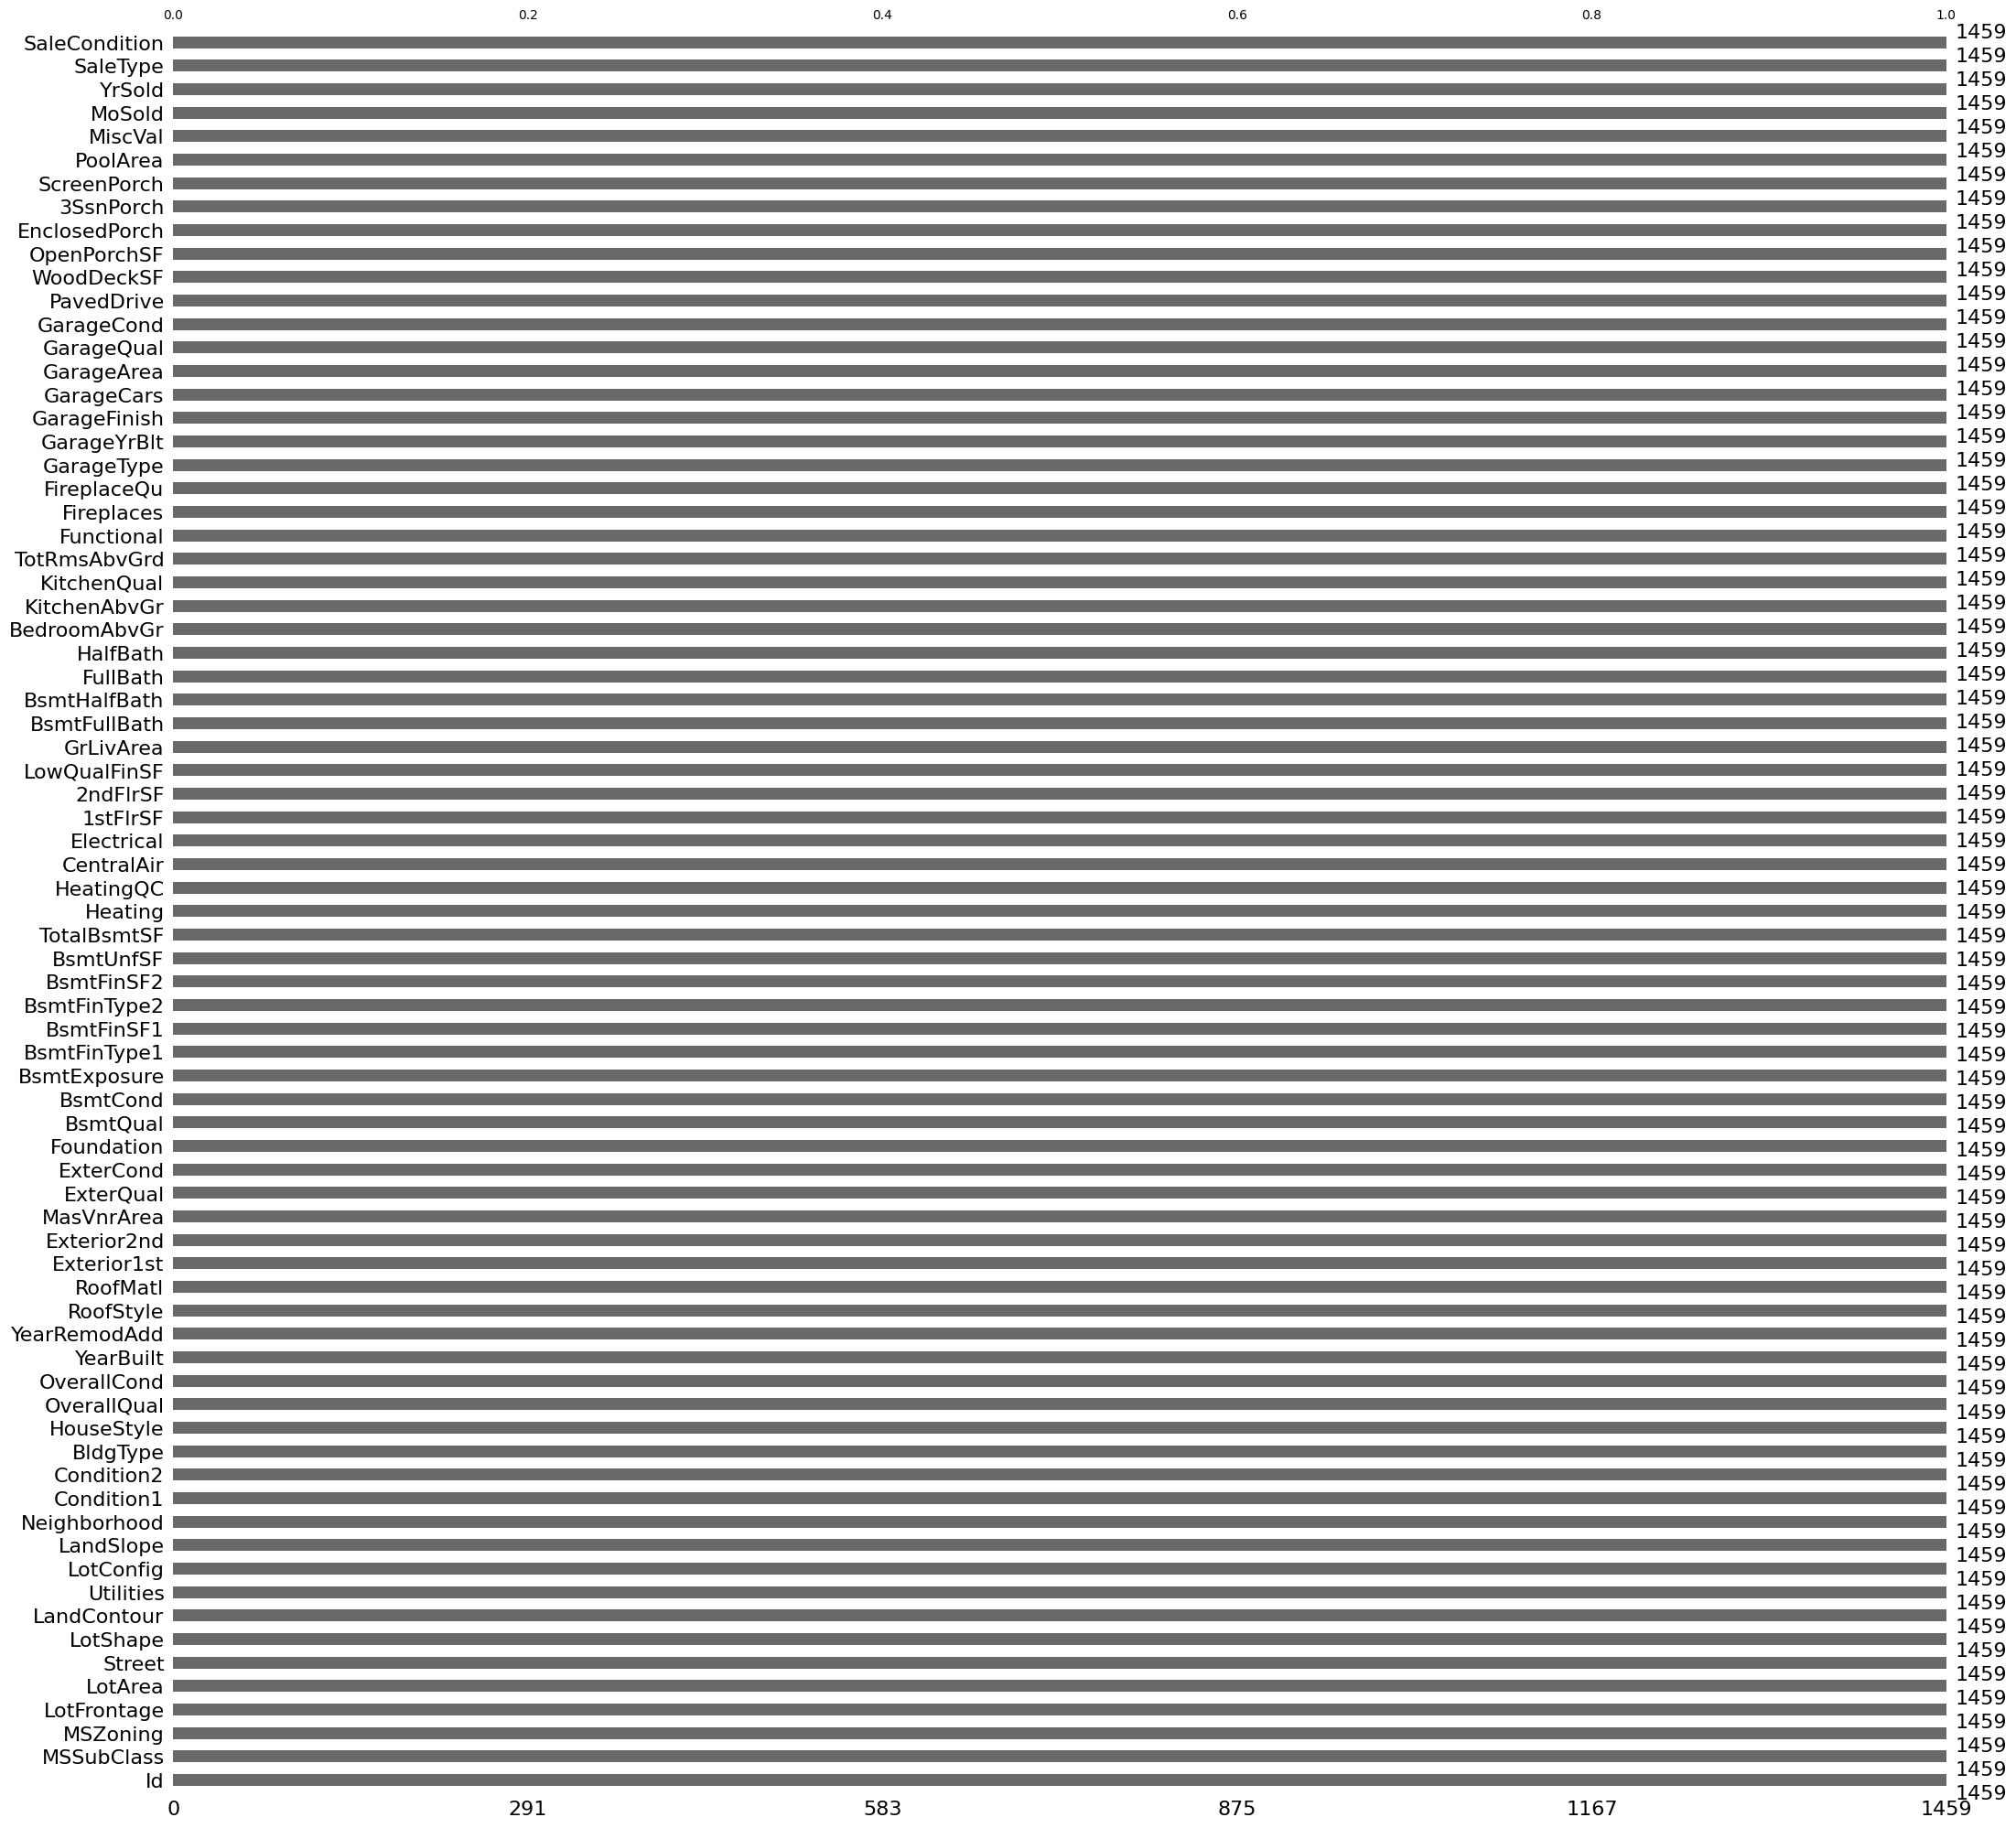

In [32]:
msno.bar(test)

In [33]:
X_train.shape

(1168, 75)

In [34]:
# test = pd.get_dummies(test,drop_first=True,dtype='int')


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = test.select_dtypes(include='object').columns
numerical_columns = test.select_dtypes(include=['int64','float64']).columns

print(categorical_columns)
print('='*90)
print(numerical_columns)

for col in categorical_columns:
    test[col]=encoder.fit_transform(test[col])   

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBl

In [35]:
test.shape

(1459, 75)

In [36]:
test_sc = scaler.transform(test)

In [37]:
test_pca = pca.transform(test_sc)

In [38]:
test_pred = lin_reg.predict(test_pca)

In [39]:
submission_df = pd.DataFrame({
    'Id':test['Id'],
    'SalePrice':test_pred,
})

In [40]:
submission_df.to_csv('submission.csv', index=False)

In [41]:
submission_df.head()

,Id,SalePrice
0,1461,108908.320013
1,1462,147220.391707
2,1463,173379.718148
3,1464,189015.794747
4,1465,180821.600608


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [43]:
def regression_models(x, y):
    models={
        'Decision Tree': DecisionTreeRegressor(),
        'Linear Regression': LinearRegression(),
        'KNN' : KNeighborsRegressor(),
        'Random Forest' : RandomForestRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'GradientBoost' : GradientBoostingRegressor()
    }

    # pipeline = {name: Pipeline([
    # ('scaler', StandardScaler),
    # ('models', models)
    # ]) for name, models in models.items()}

    results={}

    for name, model in models.items():
        model.fit(X_train_pca, y_train)      # fit the model
        
        y_pred = model.predict(X_test_pca)  # make predictions
        
        rmse=np.sqrt(mean_squared_error(y_test, y_pred)) # evaluate the model
        
        r2=r2_score(y_test, y_pred)            # evaluare the model
        
        # store the result
        
        results[name]={'RMSE':rmse, 'R2':r2}
        
        # print the model
        print(f"Model : {name}")
        print(f"RMSE : {rmse}")
        print(f"R2 Score : {r2}")
        print("=="*40)



In [44]:
regression_models(X_train_pca,y_train)

Model : Decision Tree
RMSE : 43044.68934811056
R2 Score : 0.758439832801476
Model : Linear Regression
RMSE : 34126.832709632734
R2 Score : 0.8481628187208015
Model : KNN
RMSE : 40544.4165201961
R2 Score : 0.7856871185709342
Model : Random Forest
RMSE : 34706.87143095438
R2 Score : 0.8429575363566528
Model : AdaBoost
RMSE : 39138.67582840813
R2 Score : 0.8002906389866598
Model : GradientBoost
RMSE : 33649.134692621956
R2 Score : 0.8523838185002772


In [45]:
# cv_results={}

# for name, model in models.items():
#     cv_score = cross_val_score(models, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
#     cv_results[name]=cv_score.mean()

#     print(f"Model: {name}")
#     print(f"Cross Validation Score : {-cv_results[name]:.4f}")
#     print(f"=="*40)


# result_df = pd.DataFrame(results).reset_index(drop=True)
# print('House Prediction Model', result_df)

# return result_df

In [46]:
model = DecisionTreeRegressor()

In [47]:
model.fit(X_train_pca, y_train)

DecisionTreeRegressor()

In [48]:
y_pred = model.predict(X_test_pca)

In [49]:
print(f"RMSE : {np.sqrt(mean_squared_error(y_pred, y_test))}")
print(f"R2 Score : {r2_score(y_pred, y_test)}")

RMSE : 46496.847192276575
R2 Score : 0.6675327997042222


In [54]:
test_pca

array([[-2.88139143, -1.86068387,  0.39152269, ..., -0.80216213,
         0.18778478,  1.17524163],
       [-1.38794035, -1.0651432 ,  2.53707717, ..., -0.97190002,
        -1.39487758,  0.40258636],
       [ 1.14978932, -0.22998749, -0.863846  , ..., -0.27181899,
         0.50074122,  1.0999147 ],
       ...,
       [-0.68617533, -0.97737719,  3.18089669, ...,  0.44150892,
        -0.47786903,  1.01658167],
       [-2.36093682, -1.49027343, -1.35315535, ..., -0.40453576,
        -0.08392626,  0.19969788],
       [ 2.7258526 ,  0.96793209,  0.24722164, ...,  0.51847536,
         2.0378544 ,  1.37160887]])

In [50]:
test_pred = model.predict(test_pca)

In [55]:
result_df = pd.DataFrame({
    'Id':test['Id'],
    'SalePrice':test_pred
})

In [56]:
result_df.to_csv('result_df.csv', index=False)

NameError: name 'test_pca' is not defined